# Setup

In [ ]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt

import plotly.graph_objects as go
#import plotly.express as pxd
 

from wordcloud import WordCloud
from IPython.display import Image

# pd.set_option('display.max_rows', None)
#  pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Import Dataset

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/GoEmotions/data/train.tsv", sep='\t', header=None, names=['Text', 'Class', 'ID'])
df_dev = pd.read_csv("/content/drive/MyDrive/GoEmotions/data/dev.tsv", sep='\t', header=None, names=['Text', 'Class', 'ID'])
df_test = pd.read_csv("/content/drive/MyDrive/GoEmotions/data/test.tsv", sep='\t', header=None, names=['Text', 'Class', 'ID'])

In [ ]:
df = pd.concat([df_train, df_dev, df_test])

In [ ]:
df.tail()

,Text,Class,ID
5422,Thanks. I was diagnosed with BP 1 after the ho...,15,efeeasc
5423,Well that makes sense.,4,ef9c7s3
5424,Daddy issues [NAME],27,efbiugo
5425,So glad I discovered that subreddit a couple m...,0,efbvgp9
5426,"Had to watch ""Elmo in Grouchland"" one time too...",27,edtjpv6


In [ ]:
df.describe()

,Text,Class,ID
count,54263,54263,54263
unique,53994,782,54263
top,Thank you.,27,eebbqej
freq,15,16021,1


In [ ]:
# Count total NaN in a DataFrame
print(" \nCount total NaN in a DataFrame : \n\n",
       df.isnull().sum().sum())

 
Count total NaN in a DataFrame : 

 0


## Data Processing

In [ ]:
df['List of classes'] = df['Class'].apply(lambda x: x.split(','))

In [ ]:
df['Len of classes'] = df['List of classes'].apply(lambda x: len(x))

In [ ]:
df[df['Len of classes'] == 5]

,Text,Class,ID,List of classes,Len of classes
7873,Yeah I probably would've started crying on the...,"9,12,14,19,25",ee6lqiq,"[9, 12, 14, 19, 25]",5


In [ ]:
temp_df = df["Len of classes"].value_counts().sort_index()

trace1 = go.Bar(
                x = ['1','2','3','4','5'],
                y = temp_df.tolist(),
                marker = dict(color = 'rgb(250,13,92)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_df.tolist(), textposition='outside',
                width=[0.5, 0.5, 0.5, 0.5, 0.5])
layout = go.Layout(template= "plotly_dark",title = 'Number of classes' , xaxis = dict(title = 'Class Numbers'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [ ]:
# remove values with more than one class
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

df = filter_rows_by_values(df, "Len of classes", ["2","3","4","5"])

In [ ]:
df.head()

,Text,Class,ID,List of classes,Len of classes
0,My favourite food is anything I didn't have to...,27,eebbqej,[27],1
1,"Now if he does off himself, everyone will thin...",27,ed00q6i,[27],1
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj,[2],1
3,To make her feel threatened,14,ed7ypvh,[14],1
4,Dirty Southern Wankers,3,ed0bdzj,[3],1


In [ ]:
emotions_map = {}

In [ ]:
with open('/content/drive/MyDrive/GoEmotions/data/emotions.txt', 'r') as f:
    for i,emotion in enumerate(f):
        emotions_map[str(i)] = emotion.strip()

In [ ]:
emotions_map

{'0': 'admiration',
 '1': 'amusement',
 '10': 'disapproval',
 '11': 'disgust',
 '12': 'embarrassment',
 '13': 'excitement',
 '14': 'fear',
 '15': 'gratitude',
 '16': 'grief',
 '17': 'joy',
 '18': 'love',
 '19': 'nervousness',
 '2': 'anger',
 '20': 'optimism',
 '21': 'pride',
 '22': 'realization',
 '23': 'relief',
 '24': 'remorse',
 '25': 'sadness',
 '26': 'surprise',
 '27': 'neutral',
 '3': 'annoyance',
 '4': 'approval',
 '5': 'caring',
 '6': 'confusion',
 '7': 'curiosity',
 '8': 'desire',
 '9': 'disappointment'}

In [ ]:
for i in emotions_map:
    df[emotions_map[i]] = df['List of classes'].apply(lambda x: 1 if i in x else 0)

In [ ]:
temp_df = df.copy()
temp_df.drop(['Class', 'ID', 'List of classes', 'Len of classes'], axis=1, inplace =True)

In [ ]:
emotion_list = list(emotions_map.values())

In [ ]:
temp_list = temp_df.drop(['Text'], axis=1).sum(axis=0).tolist()
trace1 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [ ]:
df = df[ df["Len of classes"] == 1] # remove values with more than one class
df = df[ df["Class"] != "27"] # remove emotion neutral
df["Class"].value_counts()

0     3384
15    2378
4     2367
1     2046
10    1809
3     1809
18    1760
7     1729
2     1265
20    1087
6     1057
17    1052
25    1003
26     902
9      888
5      831
22     749
11     635
13     619
14     553
8      497
24     437
12     246
19     105
23     103
21      67
16      47
Name: Class, dtype: int64

## One-hot encoding

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

feature_column = "Text"
df = df[ df["Len of classes"] == 1]
df = df[ df["Class"] != 27]
df["Class"].value_counts()

vectorizer = TfidfVectorizer(max_features= 3000, analyzer='word', token_pattern=r'\S+')
experimental_feature = df[feature_column].to_list()
labels = df['Class'].to_list()
vectors = vectorizer.fit_transform(experimental_feature)
print(df[feature_column].head(), df.shape, sep="\n")
X_train, X_test, y_train, y_test = train_test_split(
    vectors, labels, test_size=0.33, random_state=42)

2                       WHY THE FUCK IS BAYLESS ISOING
3                          To make her feel threatened
4                               Dirty Southern Wankers
5    OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...
6    Yes I heard abt the f bombs! That has to be wh...
Name: Text, dtype: object
(29425, 33)


In [ ]:
X_train.shape

(19714, 3000)

In [ ]:
X_train

<19714x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 197475 stored elements in Compressed Sparse Row format>

# Modeling

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Predict on the test set results
y_pred = rf.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score
print(format(accuracy_score(y_test, y_pred)))

0.4855318710740397


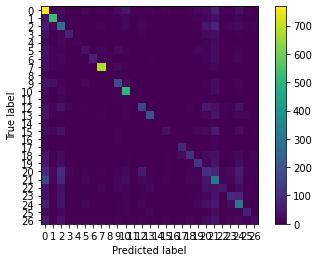

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

# print('Confusion matrix\n\n', cm)
ConfusionMatrixDisplay(cm).plot(include_values=False)

In [ ]:
pd.DataFrame(y_pred).value_counts()

0     1753
4     1160
10     854
15     764
7      736
18     708
1      692
3      513
17     321
2      310
20     282
6      226
26     218
25     195
5      145
24     139
13     132
8      125
11     113
14     101
9      101
22      92
12      14
19       5
16       4
21       4
23       4
dtype: int64

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.71      0.54      1079
           1       0.76      0.75      0.75       700
          10       0.32      0.48      0.38       575
          11       0.60      0.32      0.42       210
          12       0.43      0.08      0.13        78
          13       0.25      0.17      0.20       195
          14       0.63      0.35      0.45       185
          15       0.89      0.86      0.88       785
          16       1.00      0.27      0.42        15
          17       0.55      0.50      0.52       355
          18       0.71      0.86      0.78       583
          19       0.20      0.04      0.07        23
           2       0.49      0.37      0.42       418
          20       0.69      0.54      0.60       361
          21       0.00      0.00      0.00        29
          22       0.35      0.13      0.19       249
          23       0.50      0.06      0.11        32
          24       0.64    

In [ ]:
y_score = rf.predict_proba(X_test)

In [ ]:
y_test

In [ ]:
from sklearn.metrics import top_k_accuracy_score
y_test 
y_score
top_k_accuracy_score(y_test, y_score, k=2)



0.6027185665739883

## Linear Support Vector Classifier

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train,y_train)

LinearSVC()

In [ ]:
clf.score(X_test,y_test)

0.5001544640098857

In [ ]:
predictions = clf.predict(X_test)
pd.DataFrame(predictions).value_counts()

0     1390
4      864
15     747
1      715
18     690
10     673
7      665
3      492
2      424
17     356
20     352
25     332
6      294
26     281
5      242
9      198
14     172
11     167
22     159
8      148
24     139
13     122
12      47
19      18
23      11
21       7
16       6
dtype: int64

In [ ]:
df["Class"].value_counts()

0     3384
15    2378
4     2367
1     2046
10    1809
3     1809
18    1760
7     1729
2     1265
20    1087
6     1057
17    1052
25    1003
26     902
9      888
5      831
22     749
11     635
13     619
14     553
8      497
24     437
12     246
19     105
23     103
21      67
16      47
Name: Class, dtype: int64

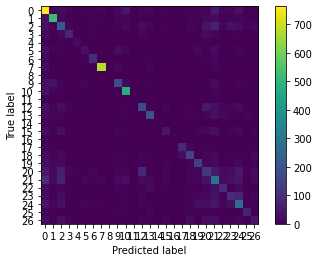

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)

# print('Confusion matrix\n\n', cm)
ConfusionMatrixDisplay(cm).plot(include_values=False)

## Naive Bayes Classifier

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# X_train.todense()
# instantiate the model
gnb = GaussianNB(var_smoothing = 1e-5)

# fit the model
gnb.fit(X_train.todense(), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



GaussianNB(var_smoothing=1e-05)

In [ ]:
y_score = gnb.predict_proba(X_test.todense())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



In [ ]:
from sklearn.metrics import top_k_accuracy_score
y_test
y_score
top_k_accuracy_score(y_test, y_score, k=2)


0.1588919781690866

In [ ]:
y_pred = gnb.predict(X_test.todense())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Compare the train-set and test-set accuracy
y_pred_train = gnb.predict(X_train.todense())

y_pred_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



array(['12', '19', '26', ..., '5', '17', '19'], dtype='<U2')

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train.todense(), y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test.todense(), y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



Training set score: 0.4212


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



Test set score: 0.1089


## XGBoost

In [ ]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
print(model)

XGBClassifier(objective='multi:softprob')


In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 10.89%
